In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

In [84]:
# data = pd.read_csv("beam_exp_1_draft.csv", encoding = "ISO-8859-1")
data = pd.read_csv("proposal_data.csv", encoding = "ISO-8859-1")
data.head()

,Primary ID,Proposal Number,Name,Owner,Brokers,Broker Commission,State,Zip,SIC,Projected Eligible EEs,...,Opportunity Record Type,Eligibles Classifcation,Territories,PI?,After 5/31,Before 7/7,After 5/31.1,Before 7/7.1,Experiment1 Period,Experiment 1 Data
0,0006fa50-bacc-0136-8f0b-0242ac110003,1805,Monarch Construction,Tenika Seitz,['Horan Associates - Cincinnati '],8.0,OH,45212,1542,70,...,Client,50 to 99,OH Area 3 | Southern OH - Northern KY,True,-218,-255,False,True,False,False
1,0010b990-361d-0137-1b04-0242ac110003,4900,"Tinker, LLC",Ian Rice,"['Trilogy Insurance Brokers, Inc.']",10.0,CA,94507,6799,2,...,Client,0 to 4,CA Area 8 | Orange County - Inland Empire,False,-59,-96,False,True,False,False
2,0022edf0-7406-0137-6bd1-0242ac110004,6760,BEL Environmental Eng,Julianne Morrow,"['The Benefits Group (Acrisure)', 'Acrisure LL...",13.0,MI,48108,8711,28,...,Client,25 to 49,MI Area 1 | Eastern,False,18,-19,True,True,True,True
3,002e9e50-42a3-0137-8d2d-0242ac110009,5231,Fast Express inc,Julianne Morrow,['VIP Brokers'],8.0,IL,60047,4731,2,...,Client,0 to 4,IL Area 2 | Chicagoland,False,-44,-81,False,True,False,False
4,00311b80-390a-0137-d9fc-0242ac110003,4993,Sand & Swirl Inc,Steven Basiakos,['Fringe Benefit Analysts'],8.0,UT,84401,1521,10,...,Client,10 to 24,UT Area 1 | Utah,True,-57,-94,False,True,False,False


In [85]:
data.describe()

,Proposal Number,Broker Commission,Projected Eligible EEs,Projected Enrolling EEs,Contract Length,Dental TLR,Vision TLR,Adjusted Dental TLR,After 5/31,Before 7/7
count,5499.000000,5499.000000,5499.000000,5467.000000,5498.000000,5494.000000,5379.000000,5494.000000,5499.000000,5499.000000
mean,4826.229496,9.190580,122.309147,39.880190,12.817024,0.646068,0.548893,0.647699,-268.561920,-305.561920
std,2821.137993,1.986696,2707.367880,558.393584,3.135179,0.252392,1.244498,0.252973,2872.684367,2872.684367
min,8.000000,0.000000,1.000000,1.000000,5.000000,0.000000,0.000000,-0.080000,-43616.000000,-43653.000000
25%,2270.000000,8.000000,7.000000,5.000000,12.000000,0.682500,0.580000,0.682500,-199.000000,-236.000000
50%,4837.000000,10.000000,17.000000,10.000000,12.000000,0.745000,0.600000,0.765000,-65.000000,-102.000000
75%,7293.000000,10.000000,47.000000,20.000000,12.000000,0.765000,0.600000,0.765000,38.000000,1.000000
max,9722.000000,20.000000,140000.000000,28000.000000,60.000000,1.500000,65.500000,1.500000,84.000000,47.000000


In [86]:
# data_final_tlr = data[(data["Dental TLR"] == 0.765) | (data["Dental TLR"] == 0.85)]
data_final_tlr = data
data_final_status = data_final_tlr[(data_final_tlr["Status"] == "Closed Won") | (data_final_tlr["Status"] == "Closed Lost")]
data_final_status["W/L"] = data_final_status["Status"].apply(lambda x: 1 if x == "Closed Won" else 0)
data_final_status.head().columns

C:\Users\Sean Furuta\Anaconda3\envs\beam\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Index(['Primary ID', 'Proposal Number', 'Name', 'Owner', 'Brokers',
       'Broker Commission', 'State', 'Zip', 'SIC', 'Projected Eligible EEs',
       'Projected Enrolling EEs', 'Contract Length', 'Completed', 'Due Date',
       'Eff Date', 'Proposal Completed', 'UW Completed', 'Created', 'Updated',
       'Submitted', 'Pull Time', 'Status', 'Dental TLR', 'Vision TLR',
       'Adjusted Dental TLR', 'ACV', 'WDTLR Calc', 'Created Date',
       'Closed Date', 'Effective Date', 'Channel', 'Opportunity Record Type',
       'Eligibles Classifcation', 'Territories', 'PI?', 'After 5/31',
       'Before 7/7', 'After 5/31.1', 'Before 7/7.1', 'Experiment1 Period',
       'Experiment 1 Data', 'W/L'],
      dtype='object')

In [101]:
matrix.dropna().shape


(4240, 42)

In [107]:
data_final_status.dropna(thresh = 0).shape

(4240, 42)

In [109]:
data_final_status["Dental TLR"].unique()

array([0.765 , 0.6825, 0.8   , 0.7   , 0.35  , 1.07  , 1.0388, 0.    ,
       0.85  , 0.6994, 0.7183, 0.745 , 0.92  , 0.55  , 0.6058, 0.83  ,
       0.77  , 0.6342, 0.7096, 0.6224, 0.5509,    nan, 0.78  , 1.01  ,
       0.76  , 0.91  , 0.8574, 0.8163, 0.6325, 0.89  , 0.65  , 0.6984,
       0.775 , 0.71  , 0.6   , 0.9   , 0.708 , 0.7957, 0.715 , 0.74  ,
       0.832 , 1.    , 0.5822, 0.5894, 0.725 , 0.955 , 0.801 , 0.695 ,
       0.4427, 0.9062, 0.7515, 0.722 , 0.75  , 0.82  , 1.0116, 0.8273,
       0.73  , 0.7855, 0.52  , 0.8619, 0.6721, 0.94  , 0.5599, 0.5679,
       0.87  , 0.8956, 1.5   , 0.785 , 0.845 , 0.7094, 0.88  , 0.9433,
       0.945 , 0.6465, 0.713 , 0.5   , 0.5927, 0.46  , 0.5662, 0.5893,
       0.6576, 0.95  , 0.8261, 0.7709, 0.5929, 0.63  , 0.9008, 1.102 ,
       0.58  , 0.691 , 0.3553, 0.5885, 0.8621, 0.79  , 0.9425, 0.822 ,
       0.9311, 1.02  , 0.7978, 0.9032, 0.86  , 0.45  , 0.6414, 0.925 ,
       0.6137, 0.8084, 0.7067, 0.6698, 0.6619, 0.7191, 1.0683, 0.4671,
      

In [88]:
matrix = data_final_status[["Projected Eligible EEs", "Dental TLR", "W/L"]].dropna()
X = matrix[["Projected Eligible EEs", "Dental TLR"]]
y = matrix["W/L"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [89]:
logit_model = LogisticRegressionCV()
logit_model.fit(X_train, y_train)
logit_model.score(X_test, y_test)

C:\Users\Sean Furuta\Anaconda3\envs\beam\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7783018867924528

In [90]:
logit_model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [91]:
logit_model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
probs = pd.DataFrame(logit_model.predict_proba(X_test), columns=["Prob Loss", "Prob Win"])
probs["prediction"] = probs["Prob Win"].apply(lambda x: 1 if x > 0.33 else 0)

In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, probs["prediction"])

array([[330,   0],
       [ 94,   0]], dtype=int64)

In [94]:
np.sum(probs["prediction"])

0

In [95]:
np.sum(y_test)

94

In [96]:
data.columns

Index(['Primary ID', 'Proposal Number', 'Name', 'Owner', 'Brokers',
       'Broker Commission', 'State', 'Zip', 'SIC', 'Projected Eligible EEs',
       'Projected Enrolling EEs', 'Contract Length', 'Completed', 'Due Date',
       'Eff Date', 'Proposal Completed', 'UW Completed', 'Created', 'Updated',
       'Submitted', 'Pull Time', 'Status', 'Dental TLR', 'Vision TLR',
       'Adjusted Dental TLR', 'ACV', 'WDTLR Calc', 'Created Date',
       'Closed Date', 'Effective Date', 'Channel', 'Opportunity Record Type',
       'Eligibles Classifcation', 'Territories', 'PI?', 'After 5/31',
       'Before 7/7', 'After 5/31.1', 'Before 7/7.1', 'Experiment1 Period',
       'Experiment 1 Data'],
      dtype='object')

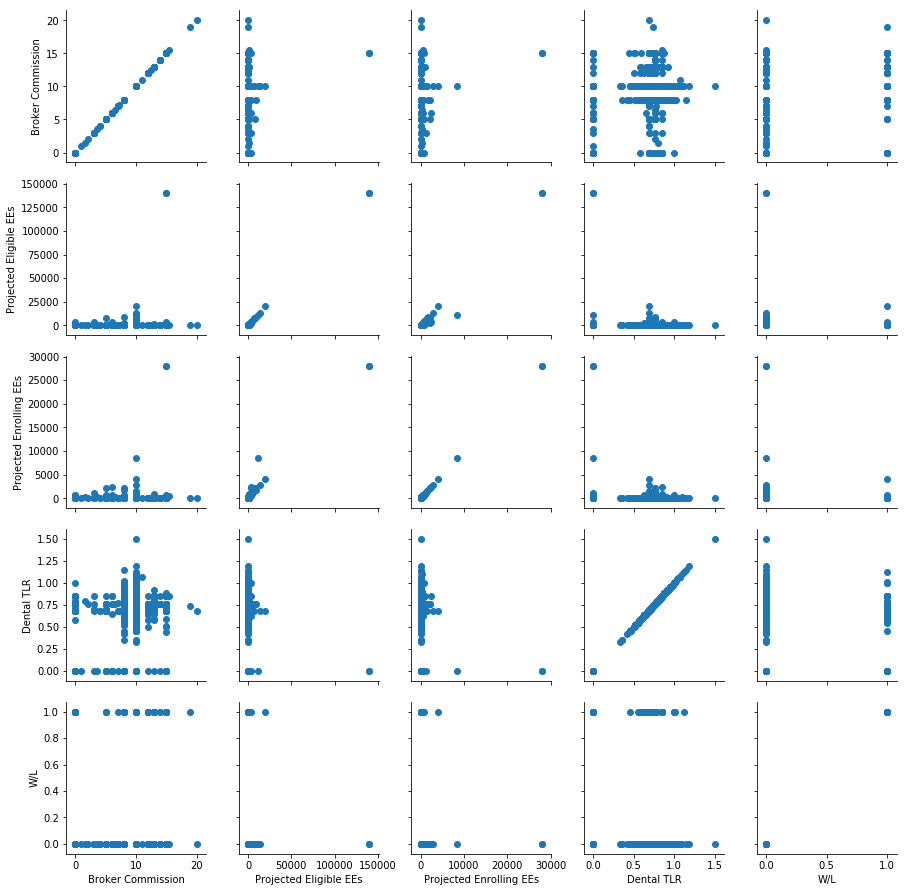

In [97]:
plot_df = data_final_status[['Broker Commission','Projected Eligible EEs', 'Projected Enrolling EEs','Dental TLR', "W/L"]]
g = sns.PairGrid(plot_df)
g.map(plt.scatter);

Automatically created module for IPython interactive environment


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

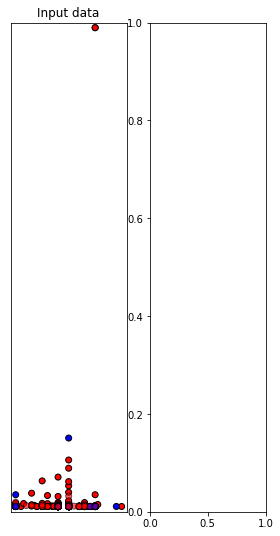

In [98]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=3, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [[data_final_status[["Broker Commission", "Projected Eligible EEs", "Dental TLR"]], data_final_status["W/L"]]
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.1, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            print(type(clf))
            print(Z)
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            print(type(clf))
            print(Z)
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [105]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=3, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [[data_final_status[["Broker Commission", "Projected Eligible EEs", "Dental TLR"]], data_final_status["W/L"]]
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.1, random_state=42)


    # iterate over classifiers
    for name, clf in zip(names, classifiers):

        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<Figure size 1944x648 with 0 Axes>

In [ ]:
for i in classifiers:
    
    pred = i.predict(X_test)
    print(type(i))
    print(confusion_matrix(y_test, pred))

In [ ]:
data_final_status.groupby(["Dental TLR", "State","W/L"]).count()